In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
import os
mingw_path = r'C:\Users\DLK\Downloads\SOURCE CODE'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [2]:
df=pd.read_csv(r'C:\Users\DLK\Downloads\SOURCE CODE/indian_liver_patient.csv')

In [3]:
df.shape

(583, 11)

In [4]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [5]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Exploratory Data Analysis

Filtering categorical data

In [6]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

## Distribution of Numerical Features

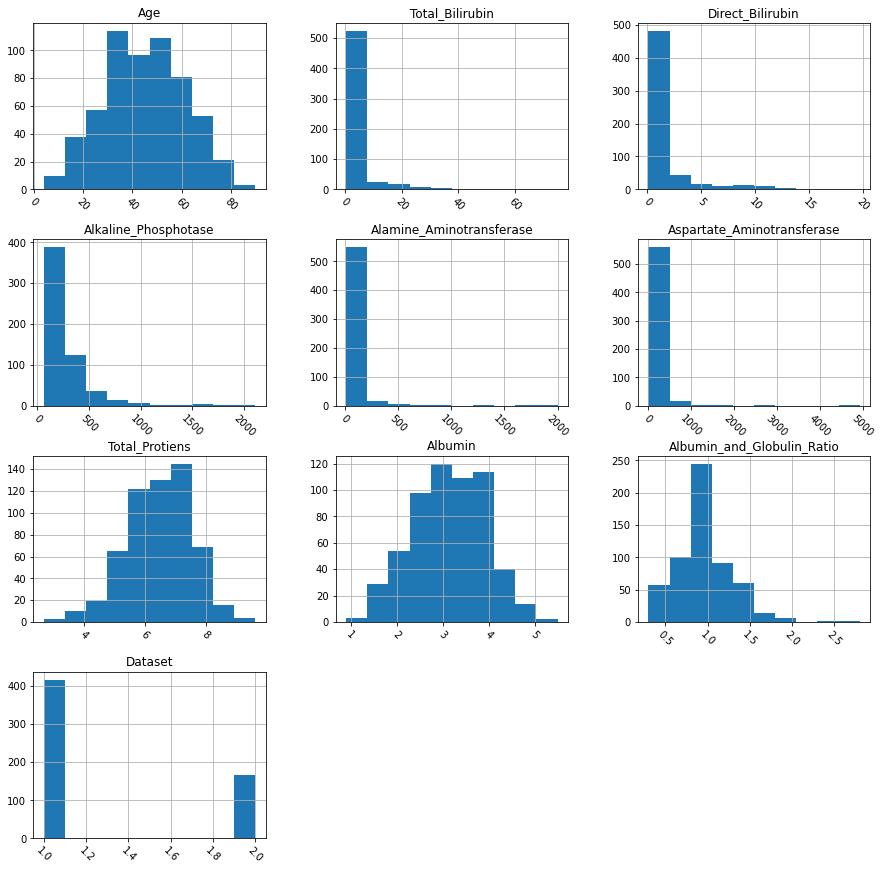

In [7]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [8]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


It seems there is outlier in Aspartate_Aminotransferase as the max value is very high than mean value

Dataset i.e output value has '1' for liver disease and '2' for no liver disease so let's make it 0 for no disease to make it convinient

In [9]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(partition)

## Distribution of categorical data

In [10]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


## Bar plots for categorical Features

<AxesSubplot:xlabel='count', ylabel='Gender'>

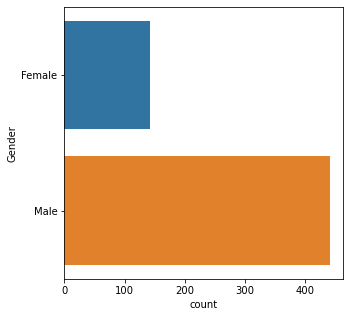

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=df)

In [12]:
df[df['Gender'] == 'Male'][['Dataset', 'Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


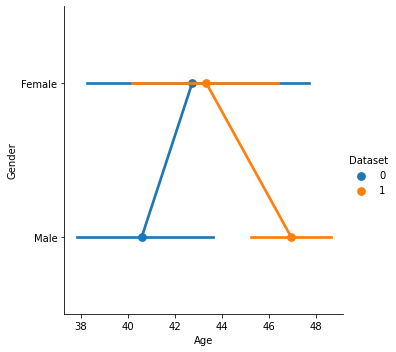

In [13]:
sns.factorplot (x="Age", y="Gender", hue="Dataset", data=df);

Age seems to be a factor for liver disease for both male and female genders

Number of patients that are male:  441
Number of patients that are female:  142


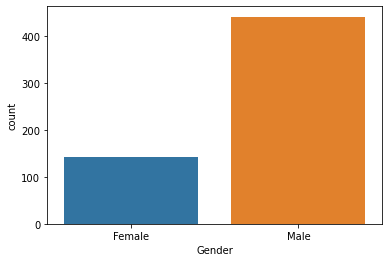

In [14]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

There are more male patients than female patients

Label Male as 0 and Female as 1

In [15]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x =='Male':
        return 0
    return 1

df['Gender'] = df['Gender'].map(partition)

#### 2-D Scatter Plot

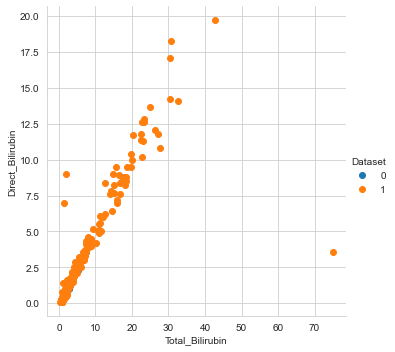

In [16]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

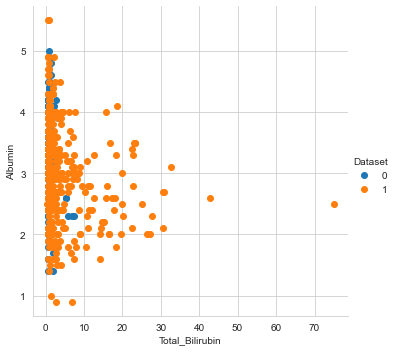

In [17]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

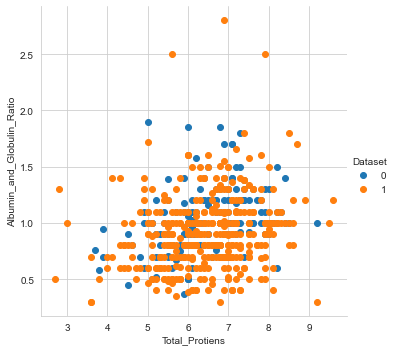

In [18]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Protiens', 'Albumin_and_Globulin_Ratio').add_legend()

In [19]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


<AxesSubplot:>

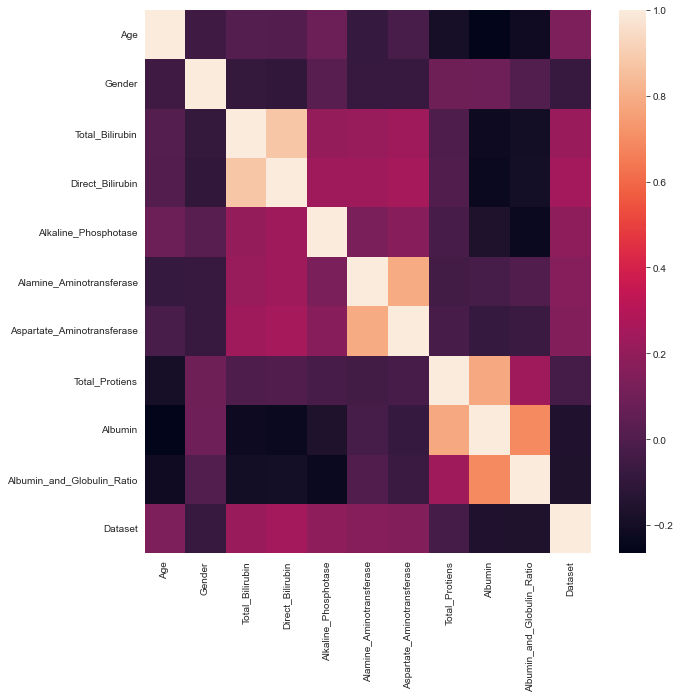

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

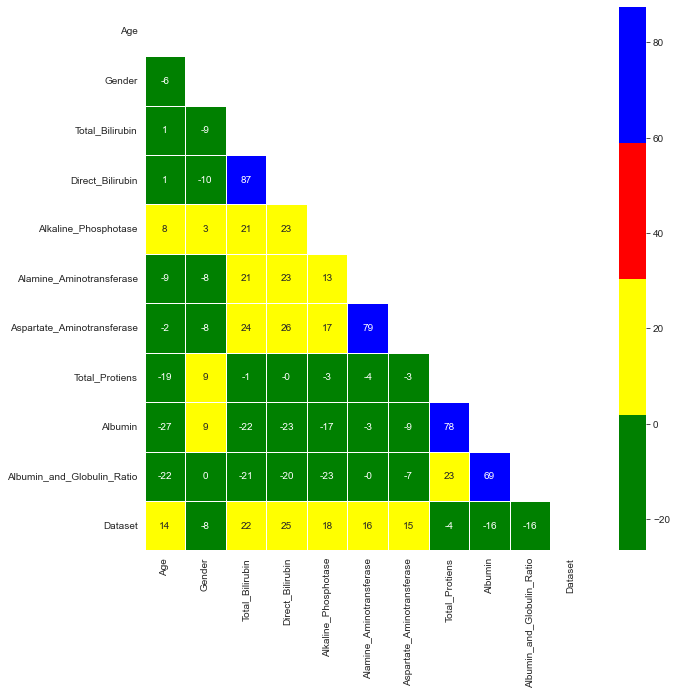

In [21]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

## Data Cleaning

In [22]:
df = df.drop_duplicates()
print( df.shape )

(570, 11)


There were 13 duplicates

## Removing Outliers

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

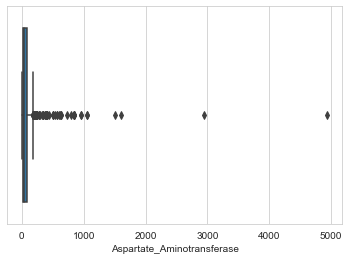

In [23]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [24]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [25]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(569, 11)

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

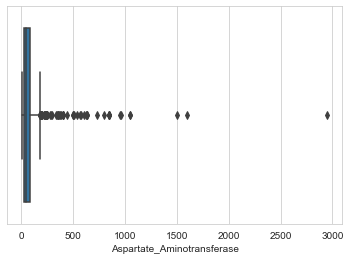

In [26]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [27]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [28]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(568, 11)

In [29]:
df.isnull().values.any()

True

In [30]:
df=df.dropna(how='any')  

In [31]:
df.shape

(564, 11)

In [32]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Machine Learning Models

### Data Preparation

In [33]:
# Create separate object for target variable
y = df.Dataset

# Create separate object for input features
X = df.drop('Dataset', axis=1)

In [34]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df.Dataset)



In [35]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(451, 10) (113, 10) (451,) (113,)


In [36]:
train_mean = X_train.mean()
train_std = X_train.std()

In [37]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [38]:
## Check for mean and std dev.
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02
mean,8.517454e-17,2.067821e-17,-1.839499e-16,-1.493878e-15,3.938707e-17,-5.452647e-17,-3.064806e-17,2.291589e-15,-4.290729e-16,2.939260e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.459710e+00,-5.980292e-01,-4.613674e-01,-5.013974e-01,-9.009611e-01,-3.943772e-01,-4.865614e-01,-3.476087e+00,-2.818030e+00,-2.023543e+00
25%,-7.595886e-01,-5.980292e-01,-3.996190e-01,-4.658144e-01,-4.636908e-01,-3.157860e-01,-4.017376e-01,-6.503894e-01,-7.121980e-01,-6.338007e-01
50%,2.975347e-02,-5.980292e-01,-3.687448e-01,-4.302314e-01,-3.270438e-01,-2.432402e-01,-3.056039e-01,7.882282e-02,3.103678e-02,1.145223e-01
75%,7.583769e-01,1.668451e+00,-1.063141e-01,-7.440091e-02,2.042996e-02,-9.814860e-02,-7.092474e-02,6.257320e-01,8.362078e-01,4.199603e-01
max,2.762091e+00,1.668451e+00,1.105471e+01,6.472879e+00,7.090935e+00,9.701578e+00,8.504762e+00,2.813368e+00,2.880103e+00,5.612406e+00


In [39]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [40]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.109816,-0.216940,-0.062052,-0.033465,-0.048222,-0.017203,0.007819,-0.082507,-0.175052,-0.218486
std,0.937258,0.851421,0.835512,1.046110,0.734043,0.661163,0.874507,0.962887,0.922474,0.851370
min,-2.338273,-0.598029,-0.445930,-0.501397,-0.768218,-0.394377,-0.469597,-2.655723,-2.198667,-1.718105
25%,-0.577433,-0.598029,-0.399619,-0.465814,-0.444170,-0.321831,-0.401738,-0.741541,-0.836070,-0.801792
50%,0.090472,-0.598029,-0.384182,-0.430231,-0.342661,-0.261377,-0.316914,-0.012329,-0.216708,-0.190916
75%,0.940533,-0.598029,-0.198937,-0.181150,-0.018612,-0.007466,-0.034168,0.625732,0.526527,0.114522
max,1.851312,1.668451,4.231512,5.974717,3.147694,4.834965,4.263572,2.175308,2.136869,2.558026


##  Model-1 Logistic Regression

In [41]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
model = GridSearchCV(LogisticRegression(), tuned_params, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [42]:
model.best_estimator_

LogisticRegression(C=0.1)

In [43]:
## Predict Train set results
y_train_pred = model.predict(X_train)

In [44]:
## Predict Test set results
y_pred = model.predict(X_test)

In [45]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [46]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.62886101, 0.60635075, 0.65628802, 0.69577814, 0.45236153,
       0.97879646, 0.56694329, 0.67530199, 0.79401715, 0.50727069])

In [47]:
i=28  ## Change the value of i to get the details of any point (56, 213, etc.)
print('For test point {}, actual class = {}, precited class = {}, predicted probability = {}'.
      format(i, y_test.iloc[i], y_pred[i], y_pred_proba[i]))

For test point 28, actual class = 1, precited class = 1, predicted probability = 0.8175521111565488


In [48]:
confusion_matrix(y_test, y_pred).T

array([[ 1,  4],
       [31, 77]], dtype=int64)

In [49]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

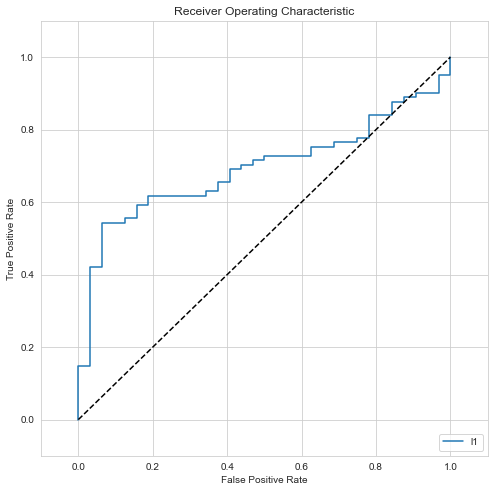

In [50]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [51]:
# Calculate AUC for Train set
print(roc_auc_score(y_train, y_train_pred))

0.5380781212556913


In [52]:
# Calculate AUC for Test set
#print(auc(fpr, tpr))
lr= auc(fpr,tpr)
lr

0.6940586419753086

#### Feature Importance

In [53]:
## Building the model again with the best hyperparameters
model = LogisticRegression(C=1, penalty = 'l2')
model.fit(X_train, y_train)

LogisticRegression(C=1)

In [54]:
indices = np.argsort(-abs(model.coef_[0,:]))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Alamine_Aminotransferase
Direct_Bilirubin
Aspartate_Aminotransferase
Albumin
Total_Protiens
Total_Bilirubin
Alkaline_Phosphotase
Age
Gender
Albumin_and_Globulin_Ratio


## Model-2 Random Forest

In [55]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [56]:
model.best_estimator_

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=500)

In [57]:
y_train_pred = model.predict(X_train)

In [58]:
y_pred = model.predict(X_test)

In [59]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [60]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.59614443, 0.62824124, 0.61762291, 0.56044272, 0.34896413,
       0.9851003 , 0.52174381, 0.49183275, 0.9408427 , 0.4193539 ])

In [61]:
confusion_matrix(y_test, y_pred).T

array([[ 6,  9],
       [26, 72]], dtype=int64)

In [62]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

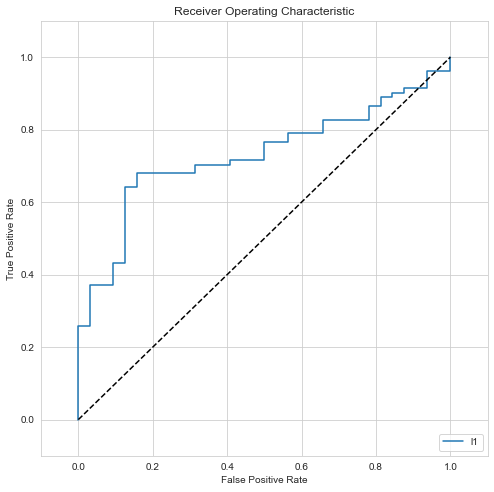

In [63]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
# Calculate AUC for Train set
roc_auc_score(y_train, y_train_pred)

0.8891924275101846

In [65]:
# Calculate AUC for Test set
#print(auc(fpr, tpr))
rf = auc(fpr, tpr)
rf

0.7295524691358024

#### Feature Importance

In [66]:
## Building the model again with the best hyperparameters
model = RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=4)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=500)

In [67]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Alkaline_Phosphotase
Total_Bilirubin
Aspartate_Aminotransferase
Alamine_Aminotransferase
Age
Direct_Bilirubin
Albumin
Total_Protiens
Albumin_and_Globulin_Ratio
Gender


## Model-4 KNN

In [68]:
# creating odd list of K for KNN
neighbors = list(range(1,20,2))
# empty list that will hold cv scores
cv_scores = []

#  10-fold cross validation , 9 datapoints will be considered for training and 1 for cross validation (turn by turn) to determine value of k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())   

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 17.


In [69]:
MSE.index(min(MSE))

8

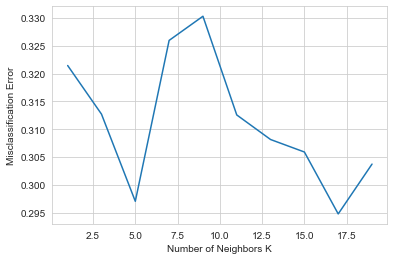

In [70]:
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [71]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [72]:
y_pred = classifier.predict(X_test)


In [73]:
y_train_pred = classifier.predict(X_train)

In [74]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)  ## get the accuracy on testing data
acc

69.91150442477876

In [75]:
cnf=confusion_matrix(y_test,y_pred).T
cnf

array([[ 4,  6],
       [28, 75]], dtype=int64)

In [76]:
# Get just the prediction for the positive class (1)
y_pred_proba = classifier.predict_proba(X_test)[:,1]

In [77]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.76470588, 0.64705882, 0.94117647, 0.64705882, 0.41176471,
       1.        , 0.41176471, 0.52941176, 0.64705882, 0.52941176])

In [78]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

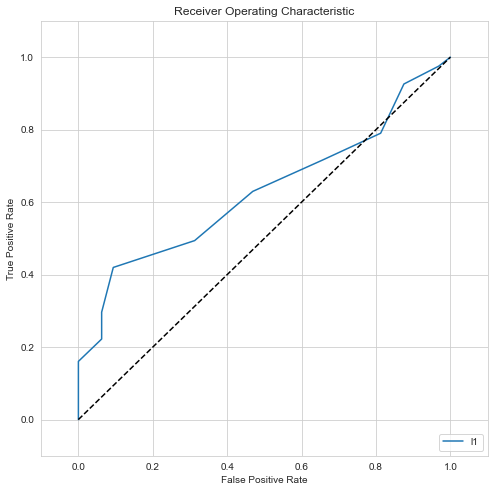

In [79]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [80]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.6376947040498442

In [81]:
# Calculate AUC for Test
#print(auc(fpr, tpr))
knn = auc(fpr, tpr)
knn

0.6282793209876544

## Model-5 Descision Trees

In [82]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [83]:
model.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_split=4)

In [84]:
y_train_pred = model.predict(X_train)

In [85]:
y_pred = model.predict(X_test)

In [86]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [87]:
y_pred_proba[:10]

array([0.75609756, 0.50724638, 0.50724638, 0.50724638, 0.        ,
       0.98319328, 0.75609756, 0.50724638, 0.98319328, 0.        ])

In [88]:
confusion_matrix(y_test, y_pred).T

array([[ 1,  5],
       [31, 76]], dtype=int64)

In [89]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

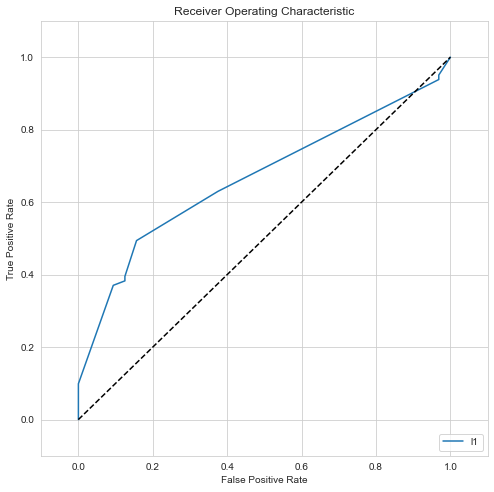

In [90]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [91]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.6130002396357537

In [92]:
#print(auc(fpr, tpr))
dt = auc(fpr, tpr)
dt

0.6664737654320988

#### Feature Importance

In [93]:
## Building the model again with the best hyperparameters
model = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=6, max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [94]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Age
Albumin_and_Globulin_Ratio
Aspartate_Aminotransferase
Alamine_Aminotransferase
Gender
Direct_Bilirubin
Total_Protiens
Albumin


## Model-6 SVC

In [95]:
from sklearn import svm
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X_train, y_train)
    grid_search.best_params_
    return grid_search.best_params_

In [96]:
svClassifier=SVC(kernel='rbf',probability=True)
svClassifier.fit(X_train,y_train)

SVC(probability=True)

In [97]:
svc_param_selection(X_train,y_train,5)

{'C': 1, 'gamma': 1}

In [98]:
###### Building the model again with the best hyperparameters
model = SVC(C=1, gamma=1)
model.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [99]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [100]:
## Predict Test results
y_pred = model.predict(X_test)

In [101]:
confusion_matrix(y_test, y_pred).T

array([[ 3,  4],
       [29, 77]], dtype=int64)

In [102]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

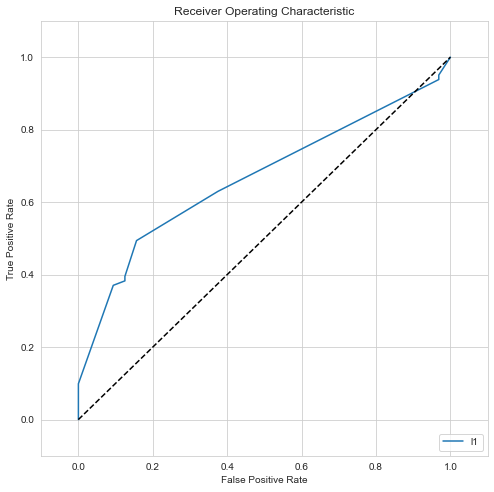

In [103]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [104]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.7782890007189072

In [105]:
#print(auc(fpr, tpr))
svc = auc(fpr, tpr)
svc

0.6664737654320988

## Model-7 Gradient Boosting

In [106]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

In [107]:
#Import Library
from sklearn.ensemble import GradientBoostingClassifier
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Gradient Boosting Classifier object
gbclass = GradientBoostingClassifier(
                    random_state = 1000,
                    verbose = 0,
                    n_estimators = 10,
                    learning_rate = 0.9,
                    loss = 'deviance',
                    max_depth = 3
                   )
#gbclass = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
# Train the model using the training sets and check score
gbclass.fit(X_train, y_train)
#Predict Output
predicted= gbclass.predict(X_test)

gbclass_score = round(gbclass.score(X_train, y_train) * 100, 2)
gbclass_score_test = round(gbclass.score(X_test, y_test) * 100, 2)
print('Score: \n', gbclass_score)
print('Test Score: \n', gbclass_score_test)
print('Accuracy: \n', accuracy_score(y_test,predicted))
print(confusion_matrix(predicted,y_test))
print(classification_report(y_test,predicted))

Score: 
 90.02
Test Score: 
 69.03
Accuracy: 
 0.6902654867256637
[[13 16]
 [19 65]]
              precision    recall  f1-score   support

           0       0.45      0.41      0.43        32
           1       0.77      0.80      0.79        81

    accuracy                           0.69       113
   macro avg       0.61      0.60      0.61       113
weighted avg       0.68      0.69      0.69       113



In [108]:
## Predict Train results
y_train_pred = gbclass.predict(X_train)

In [109]:
## Predict Test results
y_pred = gbclass.predict(X_test)

In [110]:
y_pred_proba = gbclass.predict_proba(X_test)[:,1]

In [111]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

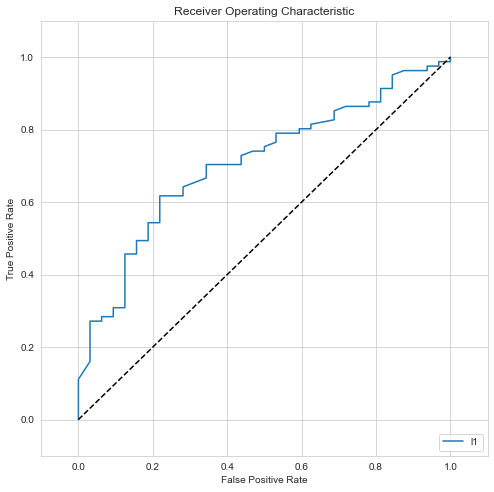

In [112]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [113]:
roc_auc_score(y_train,y_train_pred )

0.861250898634076

In [114]:
# Calculate AUC for Test
#print(auc(fpr, tpr))
gb = auc(fpr, tpr)
gb

0.707175925925926

# Neural Networks

In [115]:
# Neural Networks# Neural 
neural = MLPClassifier(hidden_layer_sizes=40,
                     activation='relu',
                     solver='adam',
                     alpha=0.001,
                     batch_size='auto',
                     max_iter=200,
                     random_state=137,
                     tol=0.0001,
                     early_stopping=False,
                     validation_fraction=0.1,
                     beta_1=0.9,
                     beta_2=0.999,
                     epsilon=1e-08,
                     learning_rate='constant',
                     power_t=0.5,
                     momentum=0.8,
                     nesterovs_momentum=True,
                     shuffle=True,
                     learning_rate_init=0.001)
neural.fit(X_train, y_train)
#Predict Output
predicted = neural.predict(X_test)

neural_score = round(neural.score(X_train, y_train) * 100, 2)
neural_score_test = round(neural.score(X_test, y_test) * 100, 2)
print('Neural Score: \n', neural_score)
print('Neural Test Score: \n', neural_score_test)
print('Accuracy: \n', accuracy_score(y_test, predicted))
print(confusion_matrix(predicted,y_test))
print(classification_report(y_test,predicted))

Neural Score: 
 77.83
Neural Test Score: 
 69.91
Accuracy: 
 0.6991150442477876
[[ 5  7]
 [27 74]]
              precision    recall  f1-score   support

           0       0.42      0.16      0.23        32
           1       0.73      0.91      0.81        81

    accuracy                           0.70       113
   macro avg       0.57      0.53      0.52       113
weighted avg       0.64      0.70      0.65       113



In [116]:
## Predict Train results
y_train_pred = neural.predict(X_train)

In [117]:
## Predict Test results
y_pred = neural.predict(X_test)

In [118]:
y_pred_proba = neural.predict_proba(X_test)[:,1]

In [119]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

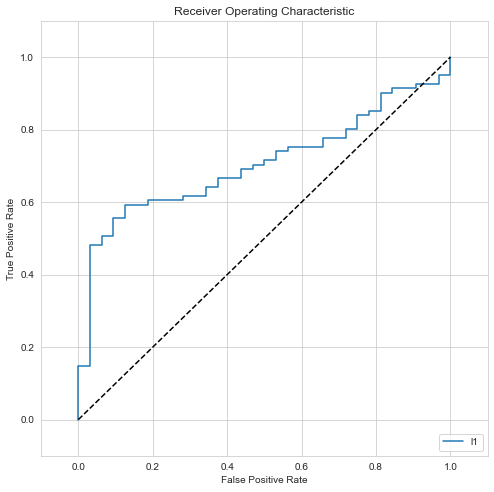

In [120]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [121]:
roc_auc_score(y_train,y_train_pred )

0.6703091301222142

In [122]:
# Calculate AUC for Test
#print(auc(fpr, tpr))
nn = auc(fpr, tpr)
nn

0.7060185185185185

In [132]:
scores = [lr,rf,knn,dt,svc,gb,nn]
algorithms = ["Logistic Regression","random forest","K-Nearest Neighbors","decision tree","SVc","gradient boost","neural network"]    

for i in range(len(algorithms)):
    print("The accuracy score "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score Logistic Regression is: 0.6940586419753086 %
The accuracy score random forest is: 0.7295524691358024 %
The accuracy score K-Nearest Neighbors is: 0.6282793209876544 %
The accuracy score decision tree is: 0.6664737654320988 %
The accuracy score SVc is: 0.6664737654320988 %
The accuracy score gradient boost is: 0.707175925925926 %
The accuracy score neural network is: 0.7060185185185185 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

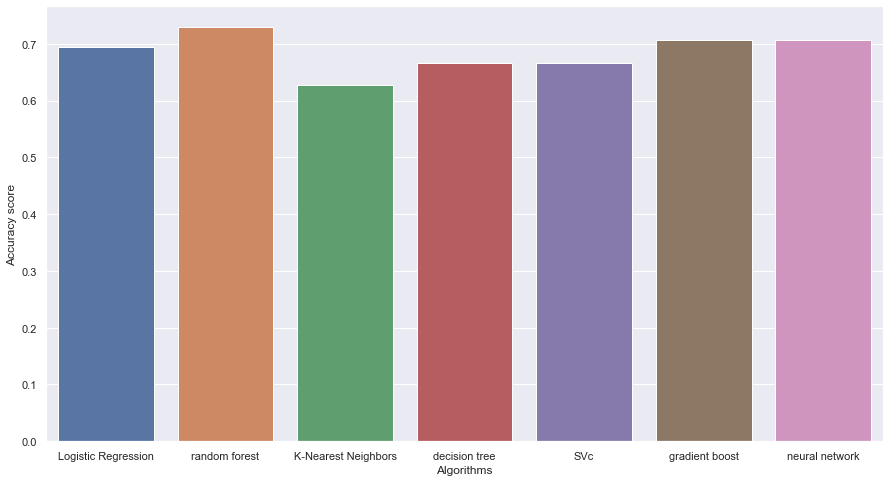

In [133]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)